# Subscribing and Plotting Real-time Data with Paho-Mqtt 

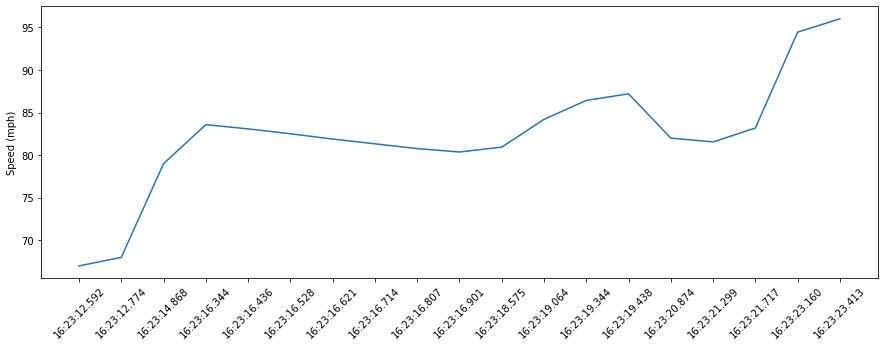

In [4]:
import paho.mqtt.client as mqtt
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
from IPython.display import clear_output
from datetime import datetime


speed_data = []
time_data = []

def probe_topic(topics=None):
    # subscribe to all the topics if no paramater provided
    if topics is None:
        topics = ["#"]
    elif isinstance(topics, str):
        topics = [topics]
    def on_connect(client, userdata, flags, rc):
        print("Connected with result code "+str(rc))
        for topic in topics:
            client.subscribe(topic)

    # The callback for when a PUBLISH message is received from the server.
    def on_message(client, userdata, msg):
        raw_data = msg.payload.decode("utf-8").split(',')
        #print(raw_data[0])
        speed_data.append(float(raw_data[0]))
        
        # just get the time part, not the date
        time_data.append(raw_data[-1][8:])
        # show last 50 records
        if len(speed_data) > 50:
            speed_data.pop(0)
            time_data.pop(0)
            
        plt.figure(figsize=(15,5))
        plt.plot(time_data, speed_data)
        plt.xticks(rotation=45)
        plt.ylabel("Speed (mph)")
        plt.show()
        clear_output(wait=True)

        
    client = mqtt.Client("testclient")
    client.on_connect = on_connect
    client.on_message = on_message
    client.username_pw_set("admin", "password")
    client.connect("apollo-mqtt.indycar.svc.cluster.local", 61613, 60)


    return client

stream = probe_topic('201788')
stream.loop_start()
# call stream.loop_stop() in another cell to stop receiving a stream